In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import os 
import collections
import pickle as pkl

In [2]:
DATA_PATH = '/N/slate/baotruon/marketplace/data'

In [3]:
graph = ig.Graph.Read_GML(os.path.join(DATA_PATH, 'follower_network.gml'))

In [4]:
n_humans = graph.vcount()

In [5]:
n_humans

10006

## Ratio of humans vs bots 

In [6]:
ABS_PATH = "/N/u/baotruon/Carbonate/marketplace/exps"
DATA_PATH = '/N/slate/baotruon/marketplace/data/igraph'

hub = os.path.join(DATA_PATH, 'vary_targetgamma/network_18.gml') #gamma 0.1 beta 0.01
nohub= os.path.join(DATA_PATH, 'vary_betagamma/network_gamma0.1.gml')#gamma 0.1 beta 0.02

In [7]:
hubnet = ig.Graph.Read_GML(hub)
nohubnet = ig.Graph.Read_GML(nohub)

plot the indegree vs out degree for humans where nodes are colored red if ratio of bots/humans that they follow is larger than 
probability  to retweet from bot is (1-mu)*numbot/numfriends

In [8]:
def get_bot_human_ratio(graph, mu=0.5):
    humans = [i.index for i in graph.vs if i['bot']==0]
    
    ratios=[]
    for agent in humans:
        friend_idxs = graph.successors(agent) #return those who the agent follows (list of int)
        bot_friends = [n.index for n in graph.vs if (n.index in friend_idxs) and (n['bot']==1)]
#         human_friends = [n.index for n in graph.vs if (n.index in friend_idxs) and (n['bot']==0)]
        ratios += [(len(bot_friends)/len(friend_idxs)) if len(friend_idxs)!=0 else 0]
    return ratios


In [18]:
def plot_bot_human_ratio(ax,graph,ratios,title=''):
    humans = [i.index for i in graph.vs if i['bot']==0]
    indegs = graph.degree(humans, mode='in', loops=False)
    ax.scatter(indegs, ratios, alpha=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('In degree')
    ax.set_ylabel('Bot ratio (%s)' %title)
    

In [10]:
ratio1 = get_bot_human_ratio(hubnet)
pkl.dump(ratio1, open('0429_bothums_hub.pkl', 'wb'))

In [11]:
ratio2 = get_bot_human_ratio(nohubnet)
pkl.dump(ratio2, open('0429_bothums_nohub.pkl', 'wb'))

## Run from here

In [15]:
ratio1 = pkl.load(open('0429_bothums_hub.pkl', 'rb'))
ratio2  = pkl.load(open('0429_bothums_nohub.pkl', 'rb'))

In [16]:
assert len(ratio1)==len(ratio2)

Plot for gamma 0.1 beta 0.01

Text(0.5, 1.0, 'Bot/friends ratio for human agents')

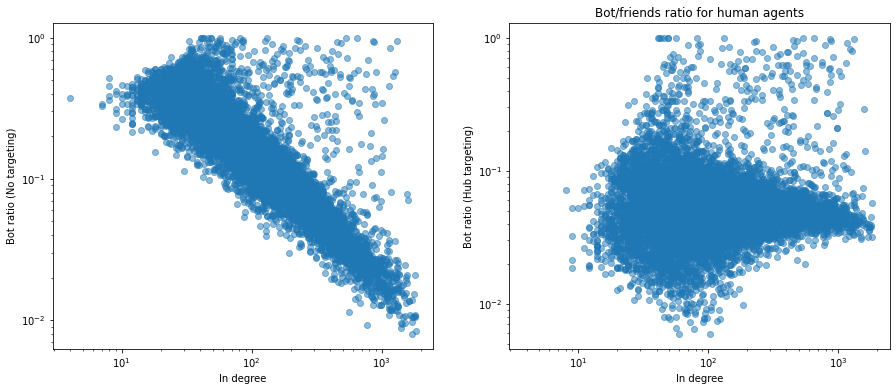

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True, figsize=(15,6))
plot_bot_human_ratio(ax1,nohubnet,ratio2, title='No targeting')
plot_bot_human_ratio(ax2,hubnet,ratio1, title='Hub targeting')

plt.title('Bot/friends ratio for human agents')

The bigger the hub is, the less bots they follow!! When there's no targeting, bots tend to concentrate in the low-mid range of degree.